In [1]:
import numpy as np #for arrays
import pandas as pd #for csv(comma seperated values) files and dataframes
import seaborn as sns
import matplotlib.pyplot as plt #to study and understand data
from matplotlib import rcParams

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

#for the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [2]:
data  = pd.read_csv('50_Startups.csv')

# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


4 columns with 50 entries with dtype float. The variables are continous varibales

In [4]:
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

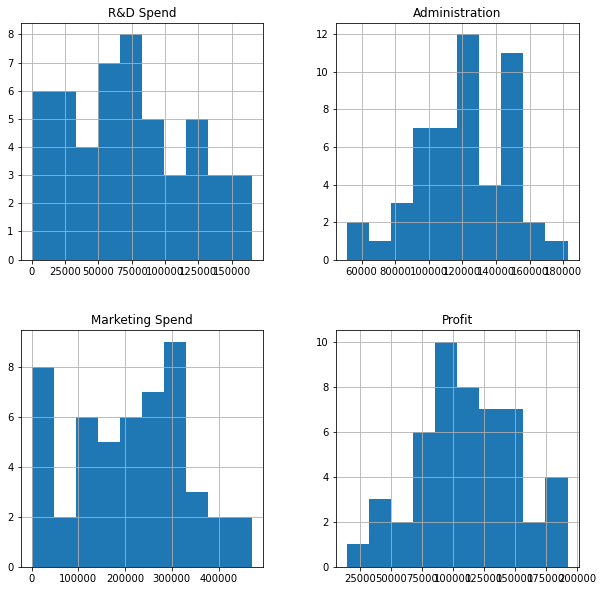

In [5]:
rcParams['figure.figsize'] = 10, 10
data.hist()

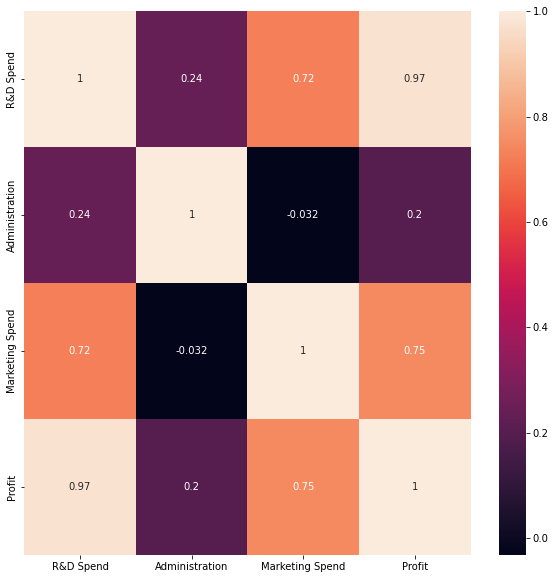

In [6]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Profit and R&D Spend are positively correlated

# Splitting the data 

In [7]:
#80 training data and 20% testing data
y = data['Profit']
X = data.drop(['Profit'], axis = 1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

Since we need to find the value of profit, we can use linear regression to predict the value

In [8]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Training another model using ridge regression to compare with the previosuly trained linear regression model

In [9]:
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(Xtrain, ytrain)
ypred1 = pipeline.predict(Xtest)

In [19]:
ytest, ypred, ypred1

(28    103282.38
 11    144259.40
 10    146121.95
 41     77798.83
 2     191050.39
 27    105008.31
 38     81229.06
 31     97483.56
 22    110352.25
 4     166187.94
 Name: Profit, dtype: float64,
 array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
        179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
        114756.11555221, 169064.01408795]),
 array([104507.30094274, 131403.9910597 , 132335.76861836,  73566.45558314,
        177818.75152076, 116688.80800144,  67906.60301075,  98075.75626949,
        115620.67662516, 167122.07845894]))

# Model Evaluation

In [11]:
#coefficient of determination
r2_score(ytest,ypred),r2_score(ytest,ypred1)

(0.9393955917820571, 0.9301964649436755)

In [12]:
#mean absolute error
mean_absolute_error(ytest,ypred),mean_absolute_error(ytest,ypred1)

(7320.4416148481205, 7712.824050505034)

In [13]:
#mean squared error
mean_squared_error(ytest,ypred),mean_squared_error(ytest,ypred1)

(77506468.16885403, 89271154.14542933)

In [14]:
#mean sqaured log error
mean_squared_log_error(ytest,ypred),mean_squared_log_error(ytest,ypred1)

(0.006984762393115117, 0.007240847075744972)

From the regression metrics, linear regression predicted better that ridge regression